# Homework 2


## References

+ Lectures 3-6 (inclusive).

## Instructions

+ Type your name and email in the "Student details" section below.
+ Develop the code and generate the figures you need to solve the problems using this notebook.
+ For the answers that require a mathematical proof or derivation you should type them using latex. If you have never written latex before and you find it exceedingly difficult, we will likely accept handwritten solutions.
+ The total homework points are 100. Please note that the problems are not weighed equally.

In [1]:
import numpy as np
np.set_printoptions(precision=3)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={"figure.dpi":100, "savefig.dpi":300})
sns.set_context("notebook")
sns.set_style("ticks")

import scipy
import scipy.stats as st
import urllib.request
import os

def download(
    url : str,
    local_filename : str = None
):
    """Download a file from a url.
    
    Arguments
    url            -- The url we want to download.
    local_filename -- The filemame to write on. If not
                      specified 
    """
    if local_filename is None:
        local_filename = os.path.basename(url)
    urllib.request.urlretrieve(url, local_filename)

## Student details

+ **First Name: Flavio**
+ **Last Name: Nardi**
+ **Email: fnardi@purdue.edu**

## Problem 1 - Failure of a mechanical component

Assume that you designing a gear for a mechanical system.
Under normal operating conditions the gear is expected to fail at a random time.
Let $T$ be a random variable capturing the time the gear fails.
What should the probability density of $T$ look like?

Here are some hypothetical data to work with.
Suppose that we took ten gears and we worked them until failure.
The failure times (say in years) are as follows:

In [4]:
time_to_fail_data = np.array(
    [
        10.5,
        7.5,
        8.1,
        8.4,
        11.2,
        9.3,
        8.9,
        12.4
    ]
)

Why does each gear fail at different times?
There are several sources of uncertainty.
The most important are:

- Manufacturing imperfections.
- Different loading conditions.

If this was a controlled fatigue experiment, then we could eliminate the second source of uncertainty by using exactly the same loading conditions.

Now, we are going to fit a probability density function to these data.
Which one should we use?
Well, new gears do not fail easily.
So, the probability density function of $T$ should be close to zero for small $T$.
As time goes by, the probability density should increase because various things start happening to the material, e.g., crack formation, fatigue, etc. 
Finally, the probability density must again start going to zero as time further increases because nothing lasts forever...
A probability distribution that is commonly used to model this situation is the [Weibull](https://en.wikipedia.org/wiki/Weibull_distribution).
We are going to fit some fail time data to a Weibull distribution and then you will have to answer a few questions about failing times.

The Weibull has parameters and we are going to fit them to the available data.
The method we are going to use is called the *maximum likelihood method*.
We haven't really talked about this, and it is not important to know what it is to do this homework problem.
We will learn about maximum likelihood in later lectures.
Here is how we fit the parameters using `scipy.stats`:

In [5]:
fitted_params = st.exponweib.fit(time_to_fail_data, loc=0)
T = st.exponweib(*fitted_params)
print(f"Fitted parameters: {fitted_params}")

Fitted parameters: (448.066965711728, 0.7099665338918923, 3.4218808260575804, 0.41627831297126994)


Let's plot the fitted Weibul PDF and the data we used:

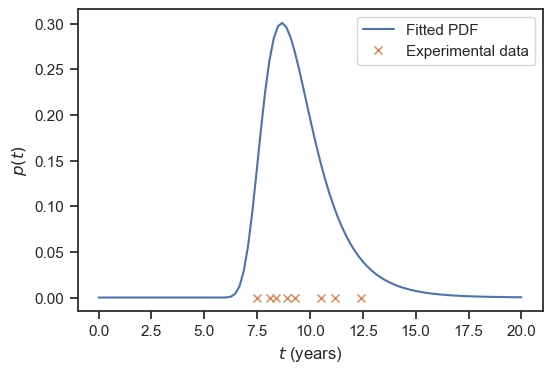

In [6]:
fig, ax = plt.subplots()
ts = np.linspace(0.0, 20.0, 100)
ax.plot(
    ts,
    T.pdf(ts),
    label="Fitted PDF"
)
ax.plot(
    time_to_fail_data,
    np.zeros_like(time_to_fail_data),
    "x",
    label="Experimental data"
)
ax.set_xlabel(r"$t$ (years)")
ax.set_ylabel(r"$p(t)$")
plt.legend(loc="best");

Now you have to answer a series of questions about the random variable $T$ that we just fitted.

A. Find the mean fail time and its variance.
Hint: Do not integrate anything by hand. Just use the functionality of ``scipy.stats``.

In [7]:
# Your code here
t_mean = T.expect()
t_var = T.var()
print(f"E[T] = {t_mean:.2f}")
print(f"V[T] = {t_var:.2f}")

E[T] = 9.53
V[T] = 2.88


B. Plot the cumulative distribution function $F(t) = P(T\le t)$ of $T$.

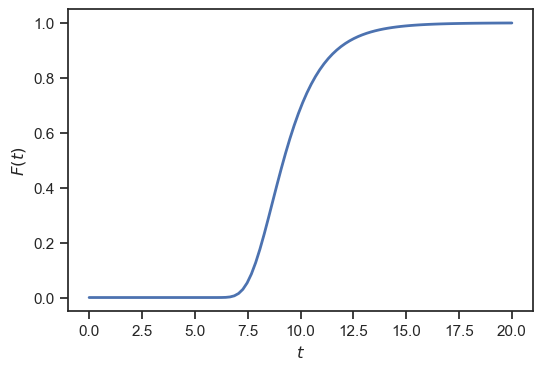

In [8]:
fig, ax = plt.subplots()
ts = np.linspace(0.0, 20.0, 100)
ax.plot(ts, T.cdf(ts), lw=2)
ax.set_xlabel("$t$")
ax.set_ylabel("$F(t)$");

C. Plot the probability that gear survives for more than $t$ as a function of $t$.
That is, plot the function:

$$
S(t) = p(T > t).
$$

Hint: First connect $S(t)$ to the cumulative distribution function $F(t)$ of $T$.

**Answer**
$S(t) = p(T > t) = 1 - p(T \le t) = 1-F(t)$

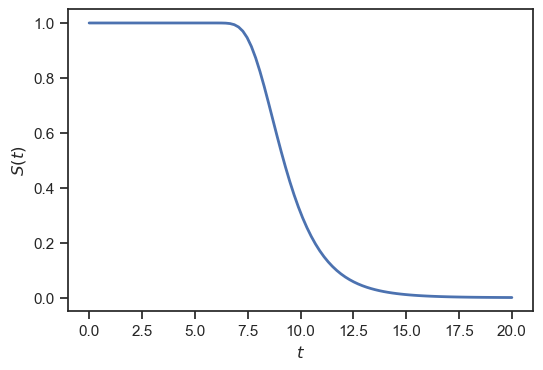

In [9]:
fig, ax = plt.subplots()
ts = np.linspace(0.0, 20.0, 100)
ax.plot(ts, 1.0-T.cdf(ts), lw=2)
ax.set_xlabel("$t$")
ax.set_ylabel("$S(t)$");

D. Find the probability that the gear lasts anywhere between 8 and 10 years.
<br>
**Answer**
<br> The probability that the gear lasts anywhere between 8 and 10 years is the same as the probability that the gear fails between 8 and 10 years.
<br><br> That is, $S(8)-S(10)=1-p(T \le 8)-1+p(T \le 10)=p(T \le 10)-p(T \le 8)$

In [10]:
# Your code here

T.cdf(10)-T.cdf(8)

0.5342898192604528

E. If you were to sell the gear, how many years "warranty" would you offer?
<br>
Hint: This is subjective. There are many correct answers.
But as a manufacturer of the gear, you really do not want to be replacing any...
<br><br>
**Answer:**
<br><br><br> Based on the data, and assuming
* the manufacturer sells millions of gears
* the manufacturer does not want to replace any gear
I would recommend 5 years warranty, as the probability of failure within 5 years is 3.961e-16 (see computation in the code block below)

In [11]:
# Probability of failing within 5 years
print(f"p[T <= 5] = {T.cdf(5.0):.20f}") 

p[T <= 5] = 0.00000000000000039607


## Problem 2 - Joint probability mass function of two discrete random variables

Consider two random variables $X$ and $Y$.
$X$ takes values $\{0,1,\dots,4\}$ and $Y$ takes values $\{0,1,\dots,8\}$.
Their joint probability mass function, can be described using a matrix:

In [12]:
P = np.array(
    [
        [0.03607908, 0.03760034, 0.00503184, 0.0205082 , 0.01051408,
         0.03776221, 0.00131325, 0.03760817, 0.01770659],
        [0.03750162, 0.04317351, 0.03869997, 0.03069872, 0.02176718,
         0.04778769, 0.01021053, 0.00324185, 0.02475319],
        [0.03770951, 0.01053285, 0.01227089, 0.0339596 , 0.02296711,
         0.02187814, 0.01925662, 0.0196836 , 0.01996279],
        [0.02845139, 0.01209429, 0.02450163, 0.00874645, 0.03612603,
         0.02352593, 0.00300314, 0.00103487, 0.04071951],
        [0.00940187, 0.04633153, 0.01094094, 0.00172007, 0.00092633,
         0.02032679, 0.02536328, 0.03552956, 0.01107725]
    ]
)

The rows of the matrix correspond to the values of $X$ and the columns to the values of $Y$.
So, if you wanted to find the probability of $p(X=2, Y=3)$ you would do:

In [13]:
print(f"p(X=2, Y=3) = {P[2, 3]:.3f}")

p(X=2, Y=3) = 0.034


A. Verify that all the elements of $P$ sum to one, i.e., that $\sum_{x,y}p(X=x, Y=y) = 1$.

In [14]:
# Your code here
print(f"sum p(X=x,Y=y) = {np.sum(P):.3f}")

sum p(X=x,Y=y) = 1.000


B. Find the marginal probability density of $X$:

$$
p(x) = \sum_{y}p(x,y).
$$

You can represent this as a 5-dimensional vector.

In [15]:
p_x = np.sum(P, axis=1)
print(f"pmf of just X: {p_x}")

pmf of just X: [0.204 0.258 0.198 0.178 0.162]


C. Find the marginal probability density of $Y$. This is a 9-dimensional vector.

In [16]:
p_y = np.sum(P, axis=0)
print(f"pmf of just Y: {p_y}")

pmf of just Y: [0.149 0.15  0.091 0.096 0.092 0.151 0.059 0.097 0.114]


D. Find the expectation and variance of $X$ and $Y$.

In [17]:
E_X = np.sum(np.arange(5) * p_x)
print(f"E[X] = {E_X:.2f}")
E_X2 = np.sum(np.arange(5) ** 2 * p_x)
V_X = E_X2 - E_X ** 2
print(f"V[X] = {V_X:.2f}")

E_Y = np.sum(np.arange(9) * p_y)
print(f"E[Y] = {E_Y:.2f}")
E_Y2 = np.sum(np.arange(9) ** 2 * p_y)
V_Y = E_Y2 - E_Y ** 2
print(f"V[Y] = {V_Y:.2f}")

E[X] = 1.84
V[X] = 1.87
E[Y] = 3.69
V[Y] = 7.19


E. Find the expectation of $E[X + Y]$.

In [18]:
# Use the expectation function provided in the hands on activity files
def expectation(f, A):
    """Returns the expectation of the function f(X, Y).
    
    Arguments:
    f -- A function f(X, Y).
    A -- A matrix containing the joint probability mass
         function of X and Y. Say that A has dimensions
         n x m. We assume that X takes values
         1, 2, ..., n and that Y takes values
         1, 2, ..., m.
    """
    n, m = A.shape
    res = 0.
    for i in range(n):
        for j in range(m):
            res += f(i + 1, j + 1) * A[i, j]
    return res

def f(x, y):
    return x + y

E_f = expectation(f, P)

print(f"E[f(X, Y)] = {E_f:.2f}")

E[f(X, Y)] = 7.53


F. Find the covariance of $X$ and $Y$. Are the two variable correlated? If yes, are they positively or negatively correlated?
<br><br>
**Answer** 
<br><br>
Yes the two variables are positively correlated, as the computation in the code block below shows. The covariance is 0.32.

In [19]:
# Covariance
C_XY = 0.0
for x in range(5):
    for y in range(9):
        C_XY += (x - E_X) * (y - E_Y) * P[x, y] # the += means add to the left hand side
print(f"C[X, Y] = {C_XY:.2f}")

C[X, Y] = 0.32


G. Find the variance of $X + Y$.

In [21]:
# Variance of X + Y
V_f = 0.0
for x in range(5):
    for y in range(9):
        V_f += (x + y - E_f)**2 * P[x, y] # the += means add to the left hand side
print(f"V[X + Y] = {V_f:.2f}")

V[X + Y] = 13.70


J. Find the probability that $X+Y$ is less than or equal to 5.
That is, find $p(X + Y \le 5)$.
Hint: Use two for loops to go over all the combinations of $X$ and $Y$ values, check if $X+Y\le 5$, and sum up the probabilities.

In [22]:
# Your code here
# Find the prob X + Y is less than some value
p_XpY = 0.0
threshold = 5
for x in range(5):
    for y in range(9):
        if x + y <= threshold:
           p_XpY += P[x, y]
print(f"p[X + Y <= 5] = {p_XpY:.2f}")

p[X + Y <= 5] = 0.53


## Problem 3 - Creating a stochastic model for the magnetic properties of steel

The magnetic properties of steel are captured in the so called [$B-H$ curve](https://en.wikipedia.org/wiki/Saturation_(magnetic)) which connects the magnetic field $H$ to the magnetic flux density $B$.
The shape of this curve depends on the manufacturing process of the steel. As a result the $B-H$ differs across different suppliers but also across time for the same supplier.

Let's use some real manufacturer data to visualize these differences.
The data are [here](https://github.com/PredictiveScienceLab/data-analytics-se/raw/master/homework/B_data.csv).
It will take a while to explain how to upload data on Google Colab.
We will do it in the next homework set.
For now, you should just know that the data file ``B_data.csv`` needs to be in the same working directory as this Jupyter notebook.
I have written a bit of code that allows you to put the data file in the right place without too much trouble.
Simply run the following:

In [2]:
url = "https://github.com/PredictiveScienceLab/data-analytics-se/raw/master/lecturebook/data/B_data.csv"
download(url)

If everything worked well, then the following will work:

In [3]:
B_data = np.loadtxt('B_data.csv')
B_data

array([[0.   , 0.005, 0.019, ..., 1.793, 1.793, 1.794],
       [0.   , 0.004, 0.014, ..., 1.837, 1.837, 1.837],
       [0.   , 0.004, 0.014, ..., 1.776, 1.776, 1.776],
       ...,
       [0.   , 0.003, 0.012, ..., 1.767, 1.767, 1.767],
       [0.   , 0.008, 0.031, ..., 1.777, 1.778, 1.778],
       [0.   , 0.003, 0.014, ..., 1.765, 1.765, 1.765]])

The shape of this dataset is:

In [4]:
B_data.shape

(200, 1500)

The rows (200) corresponds to different samples of the $B-H$ curves (different suppliers and different times).
The columns (1500) corresponds to different values of $H$.
That is, the $i, j$ element is the value of $B$ at the a specific value of $H$, say $H_j$. The values of $H$ are the equidistant and identical and we are going to ignore them in this analysis.
Let's visualize some of the samples.

Here is one sample:

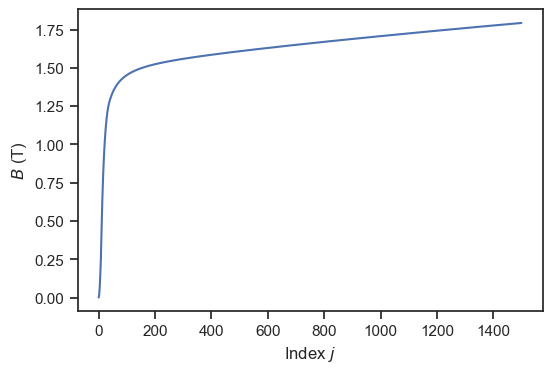

In [5]:
fig, ax = plt.subplots()
ax.plot(B_data[0, :])
ax.set_xlabel(r"Index $j$")
ax.set_ylabel(r"$B$ (T)");

Here are five samples:

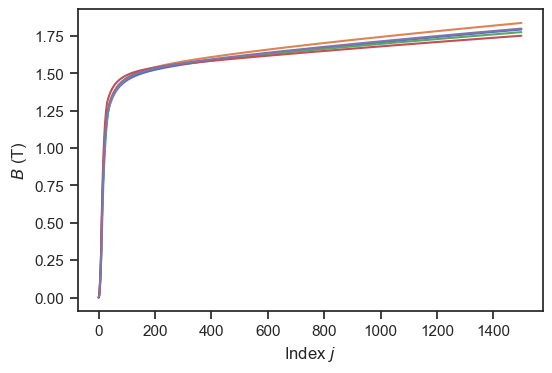

In [6]:
fig, ax = plt.subplots()
ax.plot(B_data[:5, :].T)
ax.set_xlabel(r"Index $j$")
ax.set_ylabel(r"$B$ (T)");

Here are all the samples:

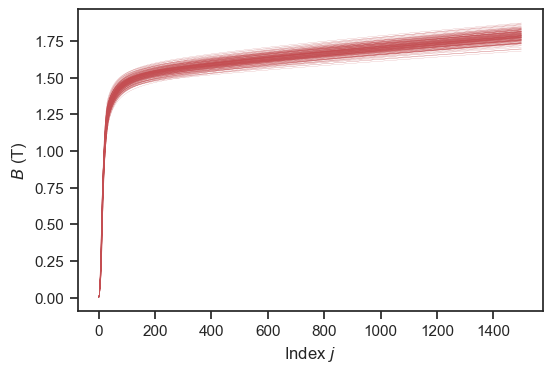

In [7]:
fig, ax = plt.subplots()
ax.plot(B_data[:, :].T, 'r', lw=0.1)
ax.set_xlabel(r"Index $j$")
ax.set_ylabel(r"$B$ (T)");

A. We are going to start by studying the data at only one index. Say index $j=500$.
Let's define a random variable

$$
X = B(H_{500}),
$$

for this reason. Extract and do a histogram of the data for $X$:

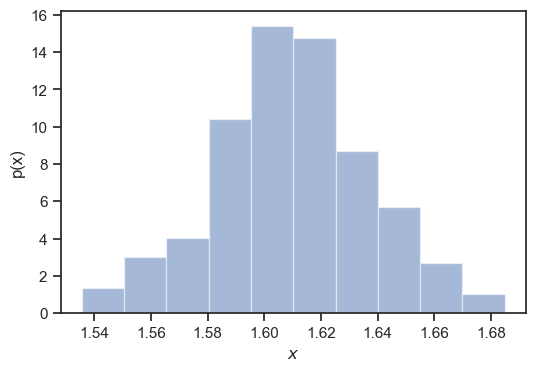

In [8]:
X_data = B_data[:, 500]
fig, ax = plt.subplots()
ax.hist(X_data, alpha=0.5, density=True)
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"p(x)");

This looks like a Gaussian $N(\mu_{500}, \sigma_{500}^2)$. Let's try to find a mean and variance for that Gaussian.
A good choice for the mean is the empirical average of the data:

$$
\mu_j = \frac{1}{N}\sum_{i=1}^NB_{ij}.
$$

Later we will learn that this is what the *maximum likelihood method* gives us.

So, the mean is:

In [9]:
mu_500 = X_data.mean()
print(f"mu_500 = {mu_500:.2f}")

mu_500 = 1.61


Similarly, for the variance a good choice is the empirical variance defined by:

$$
\sigma_j^2 = \frac{1}{N}\sum_{i=1}^N(B_{ij} - \mu_j)^2.
$$

That is:

In [10]:
sigma2_500 = np.var(X_data)
print(f"sigma_500 = {sigma2_500:.2e}")

sigma_500 = 7.42e-04


Repeat the plot of the histogram of $X$ along with the PDF of the normal variable we have just identified using the functionality of ``scipy.stats``.

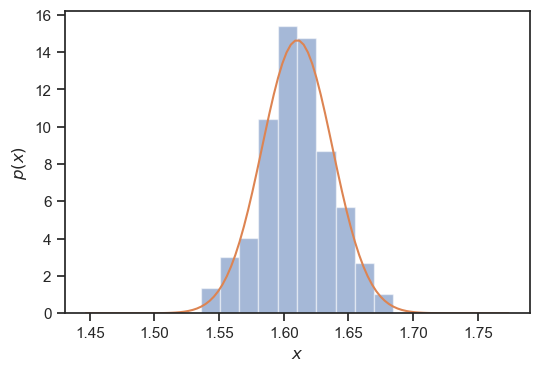

In [11]:
sigma_500 = np.sqrt(sigma2_500) 
X = st.norm(mu_500, sigma_500)
xs = np.linspace(mu_500 - 6.0 * sigma_500, mu_500 + 6.0 * sigma_500, 100)
fig, ax = plt.subplots()
ax.hist(X_data, alpha=0.5, density=True)
ax.plot(xs, X.pdf(xs))
ax.set_xlabel("$x$")
ax.set_ylabel("$p(x)$");


B. Using your normal approximation to the PDF of $X$, find the probability that $X = B(H_{500})$ is geater than 1.66 T.

In [12]:
# Your code here
1-X.cdf(1.66)

0.034355748631309635

C. Let us now consider another random variable

$$
Y = B(H_{1000}).
$$

Isolate the data for this as well:

In [13]:
Y_data = B_data[:, 1000]

Do the ``scatter`` plot of $X$ and $Y$:

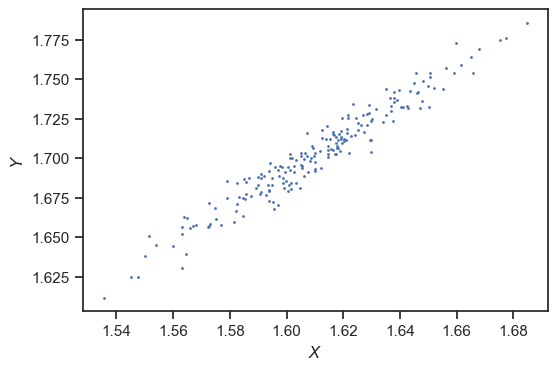

In [20]:
# Your code here
fig, ax = plt.subplots()
ax.plot(X_data, Y_data, '.', markersize=2)
ax.set_xlabel("$X$")
ax.set_ylabel("$Y$");


D. From the scatter plot, it looks like the random vector

$$
\mathbf{X} = (X, Y),
$$

follows a multivariate normal distribution. What would be the mean and covariance of the distribution.
Well, first organize the samples of $X$ and $Y$ in a matrix with the number of rows being the number of samples and two columns (one corresponding to $X$ and one to $Y$).

In [15]:
XY_data = np.hstack([X_data[:, None], Y_data[:, None]])

The mean vector is:

In [16]:
mu_XY = np.mean(XY_data, axis=0)
print(f"mu_XY = {mu_XY}")

mu_XY = [1.61  1.703]


The covariance matrix is a little bit trickier. 
We have already discussed how to find the diagonals of the covariance matrix (it is simply the variance).
For the off-diagonal terms, this is the formula that is being used:

$$
C_{jk} = \frac{1}{N}\sum_{i=1}^N(B_{ij} - \mu_j)(B_{ik} - \mu_k).
$$

This is how you can find it:

In [17]:
# Careful with np.cov because it requires you to transpose the matrix
C_XY = np.cov(XY_data.T)
print(f"C_XY =")
print(C_XY)

C_XY =
[[0.001 0.001]
 [0.001 0.001]]


Are the two variables $X$ and $Y$ positively or negatively correlated?<br>
**Answer:**
<br><br>

E. Use ``np.linalg.eigh`` to check that the matrix ``C_XY`` is indeed positive definite.

In [18]:
# Your code here
np.linalg.eigh(C_XY)

(array([2.474e-05, 1.688e-03]),
 array([[-0.753,  0.658],
        [ 0.658,  0.753]]))

F. Use the functionality of ``scipy.stats.multivariate_normal`` to plot the joint probability function of the samples of $X$ and $Y$ in the same plot as the scatter plot of $X$ and $Y$.

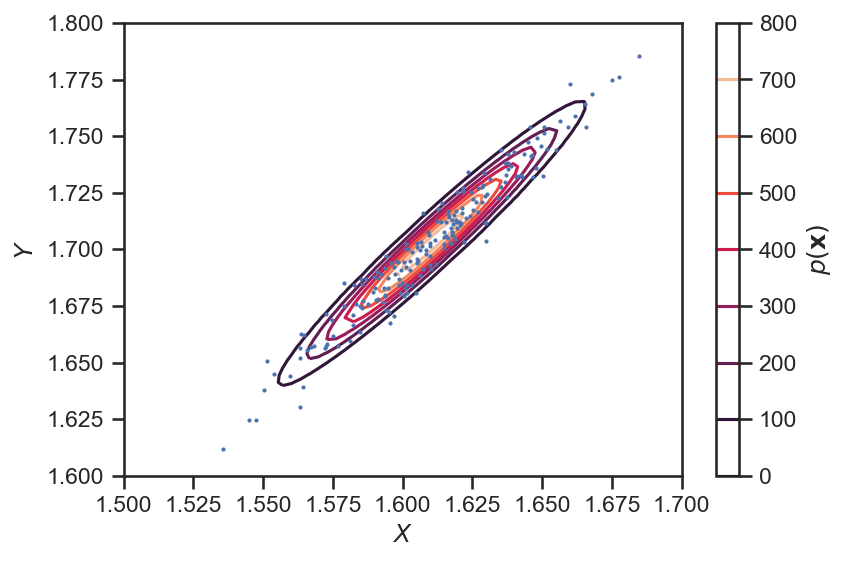

In [23]:
# The multivariate normal random vector
XY = st.multivariate_normal(mean=mu_XY, cov=C_XY)

# CONTOURS
fig, ax = plt.subplots(dpi=150)
x1 = np.linspace(1.5, 1.7, 64)
x2 = np.linspace(1.6, 1.8, 64)
X1, X2 = np.meshgrid(x1, x2)
X_flat = np.hstack(
    [
        X1.flatten()[:, None],
        X2.flatten()[:, None]
    ]
)
# PDF values
pdf_XY = XY.pdf(X_flat).reshape(X1.shape)
c = ax.contour(X1, X2, pdf_XY)
plt.colorbar(c, label='$p(\mathbf{x})$')

ax.plot(X_data, Y_data, '.', markersize=2)
ax.set_xlabel("$X$")
ax.set_ylabel("$Y$");

G. Now, let's think each $B-H$ curve as a random vector.
That is, the random vector $\mathbf{B}$ corresponds to the values of the magnetic flux density at a fixed number of $H$-values. It is:

$$
\mathbf{B} = (B(H_1), \dots, B(H_{1500})).
$$

It is like $\mathbf{X} = (X, Y)$ only now we have 1500 dimensions instead of $2$.

First, let's find the mean of this random vector:

In [24]:
B_mu = np.mean(B_data, axis=0)
B_mu

array([0.   , 0.004, 0.015, ..., 1.784, 1.784, 1.784])

Let's plot the mean on top of all the data we have:

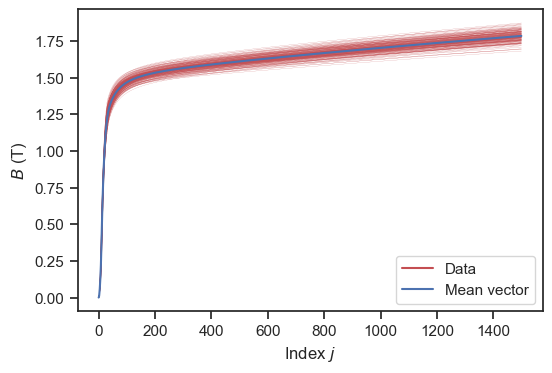

In [25]:
fig, ax = plt.subplots()
ax.plot(B_data[:, :].T, 'r', lw=0.1)
plt.plot([],[], 'r', label='Data')
ax.plot(B_mu, label="Mean vector")
ax.set_xlabel(r"Index $j$")
ax.set_ylabel(r"$B$ (T)")
plt.legend(loc="best");

It looks good. Now, find the covariance matrix of $\mathbf{B}$. This is going to be a 1500x1500 matrix.

In [26]:
B_cov = np.cov(B_data.T)
B_cov

array([[0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [0.000e+00, 1.163e-06, 4.420e-06, ..., 3.182e-06, 3.184e-06,
        3.185e-06],
       [0.000e+00, 4.420e-06, 1.680e-05, ..., 1.228e-05, 1.229e-05,
        1.229e-05],
       ...,
       [0.000e+00, 3.182e-06, 1.228e-05, ..., 1.203e-03, 1.203e-03,
        1.203e-03],
       [0.000e+00, 3.184e-06, 1.229e-05, ..., 1.203e-03, 1.203e-03,
        1.203e-03],
       [0.000e+00, 3.185e-06, 1.229e-05, ..., 1.203e-03, 1.203e-03,
        1.204e-03]])

Let's plot this matrix:

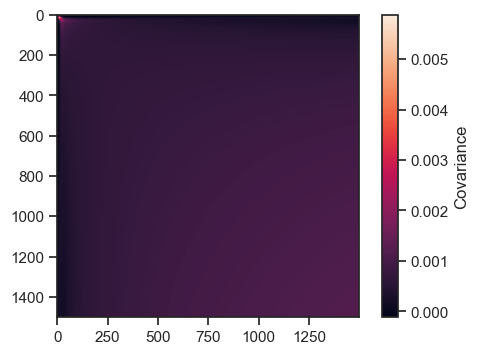

In [27]:
fig, ax = plt.subplots()
c = ax.imshow(B_cov, interpolation='nearest')
plt.colorbar(c, label="Covariance");

The numbers are very small.
This is because the covariance depends on the scale of $X$ and $Y$.
If we change the units it will change.
To get a more objective measure, we should be using the [correlation](https://en.wikipedia.org/wiki/Correlation).
The correlation is essentially the covariance of $X$ and $Y$ scaled by their standard deviation, i.e.:

$$
\rho(X, Y) = \frac{\mathbb{C}[X, Y]}{\sqrt{\mathbb{V}[X]\mathbb{V}[Y]}}.
$$

Obviously the correlation has the same sign as the covariance.
The addendum is that it is unitless and unambiguously scaled between -1 and +1.
Here is how you can find it:

In [28]:
# Note that I have to remove the first point because it is always zero
# and it has zero variance.
B_corr = np.corrcoef(B_data[:,1:].T)
B_corr

array([[1.   , 1.   , 0.999, ..., 0.085, 0.085, 0.085],
       [1.   , 1.   , 1.   , ..., 0.086, 0.086, 0.086],
       [0.999, 1.   , 1.   , ..., 0.088, 0.088, 0.088],
       ...,
       [0.085, 0.086, 0.088, ..., 1.   , 1.   , 1.   ],
       [0.085, 0.086, 0.088, ..., 1.   , 1.   , 1.   ],
       [0.085, 0.086, 0.088, ..., 1.   , 1.   , 1.   ]])

Here is the correlation visualized:

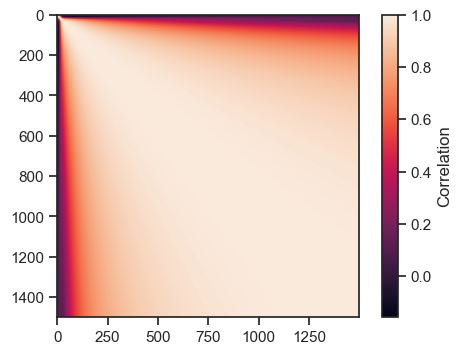

In [29]:
fig, ax = plt.subplots()
c = ax.imshow(B_corr, interpolation='nearest')
plt.colorbar(c, label="Correlation");

You see that the values are quite a bit correlated. This makes sense because the curves are all very smooth and they look very much alike. 

Let's check if the covariance is indeed positive definite:

In [30]:
print("Eigenvalues of B_cov:")
print(np.linalg.eigh(B_cov)[0])

Eigenvalues of B_cov:
[-2.857e-16 -1.235e-16 -8.636e-17 ...  4.662e-02  1.166e-01  1.207e+00]


Hmm, notice that there are several eigenvalues that are negative, but they are too small. Very close to zero. This happens very often in practice when you are finding the covariance of a very large random vectors. It arises from the fact that we are using floating point arithmetic instead of a real numbers. It is a numerical artifact.
If you tried to use this covariance to make a multivariate normal random vector using ``scipy.stats`` it would fail.
Try this:

In [31]:
B = st.multivariate_normal(mean=B_mu, cov=B_cov)

LinAlgError: singular matrix

The way to overcome this problem is to add a small positive number to the diagonal. This needs to be very small so that the distribution does not change very much. It must be the smallest possible number that makes the covariance matrix behave well. This is known as the *jitter* or the *nugget*. Find the nugget playing with the code below. Every time you try, multiply the nugget by ten.

In [35]:
# Pick the nugget here
nugget = 1e-9
# This is the modified covariance matrix
B_cov_w_nugget = B_cov + nugget * np.eye(B_cov.shape[0])
# Try building the distribution:
try:
    B = st.multivariate_normal(mean=B_mu, cov=B_cov_w_nugget)
    print('It worked! Move on.')
except:
    print('It did not work. Increase nugget by 10.')

It worked! Move on.


H. Now you have created your first stochastic model of a complicated physical quantity. By sampling from your newly constructed random vector $\mathbf{B}$ you have essentially quantified your uncertainty about the $B-H$ curve as induced by the inability to perfectly control the production of steel. Take 10 samples of this random vector and plot them.

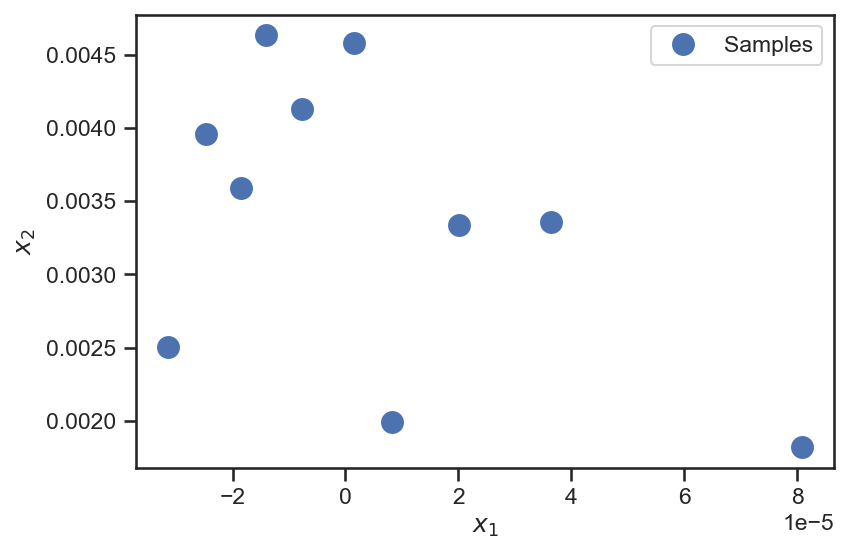

In [50]:
# SAMPLES
num_samples = 10
x_samples = B.rvs(size=num_samples)
fig, ax = plt.subplots(dpi=150)
ax.plot(
    x_samples[:, 0],
    x_samples[:, 1],
    '.',
    markersize=20,
    label='Samples'
)
plt.legend(loc='best')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$');

Congratulations!
You have made your first stochastic model of a physical field quantity.
You have now the ability to sample $B-H$ curves in a way that honors the manufacturing uncertainties.
This is the first step to uncertainty quantification studies.
The next step would be to propagate these samples through Maxwell's equations to characterize the effect on performance of an electric machine.
If you are interested to see how that looks take a look at {cite}`sahu2020` and {cite}`beltran2020`.